In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('../data/WorldPopulationByCountry.csv')
print(df.head())
print(df.info())

      pop2025     pop2050        country       area  landAreaKm cca2 cca3  \
0  1463870000  1679590000          India  3287590.0   2973190.0   IN  IND   
1  1416100000  1260290000          China  9706961.0   9424702.9   CN  CHN   
2   347276000   380847000  United States  9372610.0   9147420.0   US  USA   
3   285721000   320713000      Indonesia  1904569.0   1877519.0   ID  IDN   
4   255220000   371864000       Pakistan   881912.0    770880.0   PK  PAK   

    density  growthRate  worldPercentage  rank  
0  492.3567      0.0089           0.1829     1  
1  150.2541     -0.0023           0.1769     2  
2   37.9644      0.0054           0.0434     3  
3  152.1801      0.0079           0.0357     4  
4  331.0762      0.0157           0.0319     5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pop2025          234 non-null    int64  


In [112]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 pop2025            0
pop2050            0
country            0
area               0
landAreaKm         0
cca2               1
cca3               0
density            0
growthRate         0
worldPercentage    0
rank               0
dtype: int64


In [113]:
df["cca2"] = df["cca2"].fillna("N/A")
print(df.isna().sum())

pop2025            0
pop2050            0
country            0
area               0
landAreaKm         0
cca2               0
cca3               0
density            0
growthRate         0
worldPercentage    0
rank               0
dtype: int64


In [114]:
#the estimated total world population in 2025 by summing the values across all countries
total_pop2025 = df["pop2025"].sum()
print(f"Total World Population 2025: {total_pop2025:,}")

Total World Population 2025: 8,229,909,965


In [115]:
#Population Distribution by Rank
pop_by_rank = df.groupby("rank")["pop2025"].sum()
print(pop_by_rank.head())

rank
1    1463870000
2    1416100000
3     347276000
4     285721000
5     255220000
Name: pop2025, dtype: int64


In [116]:
#Computes the mean population growth rate across all countries
avg_growth_rate = df["growthRate"].mean()
print(f"Average Growth Rate: {avg_growth_rate:.4f}")

Average Growth Rate: 0.0086


In [117]:
# Aggregates the total land area for each country
total_area_by_country = df.groupby("country")["area"].sum()
print(total_area_by_country.head())

country
Afghanistan        652230.0
Albania             28748.0
Algeria           2381741.0
American Samoa        199.0
Andorra               468.0
Name: area, dtype: float64


In [118]:
#the top 20 countries with the highest recorded population density values
top_density = df.groupby("country")["density"].max().nlargest(20)
print(top_density)

country
Macau           21945.5015
Monaco          19170.5000
Singapore        8176.5320
Hong Kong        7043.8857
Gibraltar        5900.8824
Bahrain          2093.4140
Maldives         1765.5867
Malta            1704.3906
Bangladesh       1349.6735
Sint Maarten     1291.8529
Bermuda          1195.4630
Vatican City     1138.6364
Guernsey         1023.4444
Palestine         928.5083
Mayotte           901.0989
Jersey            866.5750
Barbados          657.2628
Taiwan            638.5281
Mauritius         624.7685
Nauru             601.2500
Name: density, dtype: float64


In [119]:
#the impact of Growth Rate on 2050 Population
growth_vs_pop2050 = df.groupby("growthRate")["pop2050"].mean()
print(growth_vs_pop2050.head())

growthRate
-0.0455    18795.0
-0.0339     9337.0
-0.0337    25195.0
-0.0166    42764.0
-0.0160     9781.0
Name: pop2050, dtype: float64


In [120]:
#how many countries are projected to have a negative population growth rate
negative_growth = len(df[df["growthRate"] < 0])
print(f"Countries with Negative Growth: {negative_growth}")

Countries with Negative Growth: 62


In [121]:
#World Percentage Distribution by Country
world_percent_dist = df.groupby("country")["worldPercentage"].sum()
print(world_percent_dist.head())

country
Afghanistan       0.0055
Albania           0.0003
Algeria           0.0059
American Samoa    0.0000
Andorra           0.0000
Name: worldPercentage, dtype: float64


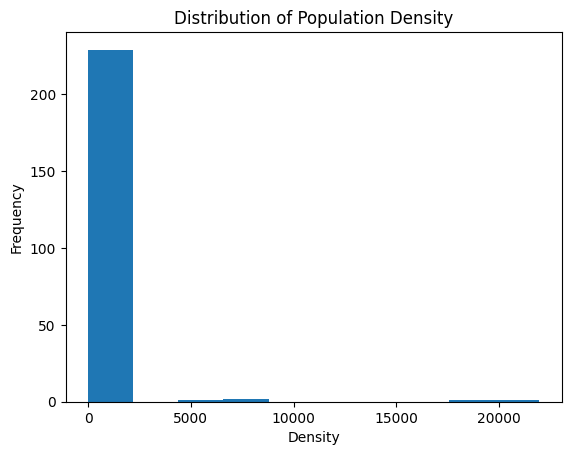

In [122]:
df["density"].plot(kind="hist")
plt.title("Distribution of Population Density")
plt.xlabel("Density")
plt.show()

In [123]:
#Computes the average population for each population rank
avg_pop_by_rank = df.groupby("rank")["pop2025"].mean()
print(avg_pop_by_rank.head())

rank
1    1.463870e+09
2    1.416100e+09
3    3.472760e+08
4    2.857210e+08
5    2.552200e+08
Name: pop2025, dtype: float64


In [124]:
#the percentage of countries with population density greater than 100 people per km²
high_density = len(df[df["density"] > 100]) / len(df) * 100
print(f"Percentage with Density > 100: {high_density:.2f}%")

Percentage with Density > 100: 50.43%


In [125]:
#how land area correlates with the 2025 population
area_vs_pop2025 = df.groupby("area")["pop2025"].mean()
print(area_vs_pop2025.head())

area
0.44       501.0
2.02     38341.0
6.80     40126.0
12.00     2608.0
21.00    11719.5
Name: pop2025, dtype: float64


In [126]:
#the mean growth rate for each population rank category
growth_by_rank = df.groupby("rank")["growthRate"].mean()
print(growth_by_rank.head())

rank
1    0.0089
2   -0.0023
3    0.0054
4    0.0079
5    0.0157
Name: growthRate, dtype: float64


In [127]:
#Categorizes countries into bins based on growth rate ranges and counts them
growth_bins = pd.cut(df["growthRate"], bins=[-0.01, 0, 0.01, 0.02, 0.03])
growth_dist = df.groupby(growth_bins, observed=False)["country"].count()
print(growth_dist)

growthRate
(-0.01, 0.0]    51
(0.0, 0.01]     67
(0.01, 0.02]    54
(0.02, 0.03]    40
Name: country, dtype: int64


In [128]:
#Categorizes countries into bins based on growth rate ranges and counts them
growth_bins = pd.cut(df["growthRate"], bins=[-0.01, 0, 0.01, 0.02, 0.03])
df["growth_bin"] = growth_bins

# top 5 countries by population in each growth bin
top3_by_bin = df.sort_values("pop2025", ascending=False).groupby("growth_bin", observed=False).head(5)

# Print top 5 countries in each bin
for bin_label, group in top3_by_bin.groupby("growth_bin", observed=False):
    print(f"\nTop 5 Countries in Growth Bin {bin_label}:")
    print(group[["country", "growthRate", "pop2025"]].to_string(index=False))



Top 5 Countries in Growth Bin (-0.01, 0.0]:
 country  growthRate    pop2025
   China     -0.0023 1416100000
  Russia     -0.0057  143997000
   Japan     -0.0053  123103000
 Germany     -0.0056   84075100
Thailand     -0.0007   71619900

Top 5 Countries in Growth Bin (0.0, 0.01]:
      country  growthRate    pop2025
        India      0.0089 1463870000
United States      0.0054  347276000
    Indonesia      0.0079  285721000
       Brazil      0.0038  212812000
       Mexico      0.0083  131947000

Top 5 Countries in Growth Bin (0.01, 0.02]:
     country  growthRate   pop2025
    Pakistan      0.0157 255220000
  Bangladesh      0.0122 175687000
       Egypt      0.0157 118366000
South Africa      0.0116  64747300
       Kenya      0.0195  57532500

Top 5 Countries in Growth Bin (0.02, 0.03]:
 country  growthRate   pop2025
 Nigeria      0.0208 237528000
Ethiopia      0.0258 135472000
Tanzania      0.0290  70545900
   Sudan      0.0240  51662100
  Uganda      0.0274  51384900


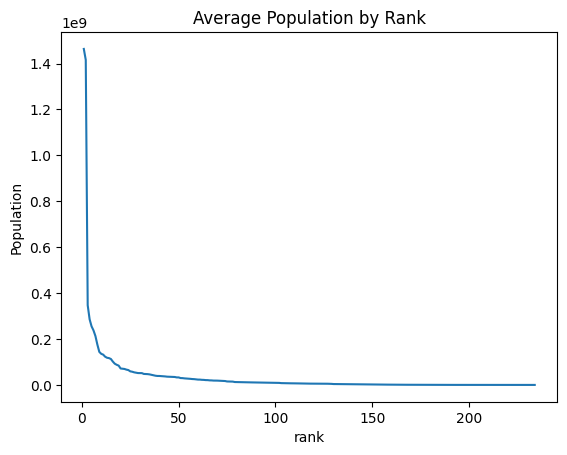

In [129]:
df.groupby("rank")["pop2025"].mean().plot(kind="line")
plt.title("Average Population by Rank")
plt.ylabel("Population")
plt.show()

In [130]:
#how population density might influence population size in 2050
density_vs_pop2050 = df.groupby("density")["pop2050"].mean()
print(density_vs_pop2050.head())

density
0.1358       49898.0
0.2850        3176.0
2.2582     4501490.0
2.2590      777316.0
3.5068    32507000.0
Name: pop2050, dtype: float64


In [131]:
#total 2050 population for each country
total_pop2050_by_country = df.groupby("country")["pop2050"].sum()
print(total_pop2050_by_country.head())

country
Afghanistan       76885100
Albania            2240170
Algeria           59565600
American Samoa       37545
Andorra              82195
Name: pop2050, dtype: int64


In [132]:
#Top 20 Countries by Growth Rate
top_growth = df.groupby("country")["growthRate"].max().nlargest(20)
print(top_growth)

country
Tokelau                     0.0407
Oman                        0.0404
Syria                       0.0384
Chad                        0.0347
Central African Republic    0.0343
Somalia                     0.0340
Niger                       0.0328
DR Congo                    0.0325
Mayotte                     0.0322
Angola                      0.0305
Ukraine                     0.0296
Mali                        0.0294
Yemen                       0.0293
Tanzania                    0.0290
Mozambique                  0.0289
United Arab Emirates        0.0289
Mauritania                  0.0282
Afghanistan                 0.0281
Zambia                      0.0281
Uganda                      0.0274
Name: growthRate, dtype: float64


In [133]:
#population by CCA3 Code
pop_by_cca3 = df.groupby("cca3")["pop2025"].sum()
print(pop_by_cca3.head())

cca3
ABW      108147
AFG    43844100
AGO    39040000
AIA       14728
ALB     2771510
Name: pop2025, dtype: int64


In [134]:
#the mean land area for each country
avg_area_by_country = df.groupby("country")["landAreaKm"].mean()
print(avg_area_by_country.head())

country
Afghanistan        652230.0
Albania             27400.0
Algeria           2381741.0
American Samoa        200.0
Andorra               470.0
Name: landAreaKm, dtype: float64


In [135]:
#how rank influences a country's percentage of the world population
rank_vs_world = df.groupby("rank")["worldPercentage"].mean()
print(rank_vs_world.head())

rank
1    0.1829
2    0.1769
3    0.0434
4    0.0357
5    0.0319
Name: worldPercentage, dtype: float64


In [136]:
#Countries with Populations Over 100 Million
high_pop_countries = df[df["pop2025"] > 100_000_000][["country", "pop2025"]]
print("Countries with Population > 100 Million in 2025:\n")
print(high_pop_countries.sort_values(by="pop2025", ascending=False).to_string(index=False))


Countries with Population > 100 Million in 2025:

      country    pop2025
        India 1463870000
        China 1416100000
United States  347276000
    Indonesia  285721000
     Pakistan  255220000
      Nigeria  237528000
       Brazil  212812000
   Bangladesh  175687000
       Russia  143997000
     Ethiopia  135472000
       Mexico  131947000
        Japan  123103000
        Egypt  118366000
  Philippines  116787000
     DR Congo  112832000
      Vietnam  101599000


In [137]:
#the percentage of countries experiencing growth rates above 1%
high_growth = len(df[df["growthRate"] > 0.01]) / len(df) * 100
print(f"Percentage with Growth > 1%: {high_growth:.2f}%")

Percentage with Growth > 1%: 44.44%


In [138]:
#the average population density per country
density_by_country = df.groupby("country")["density"].mean()
print(density_by_country.head())

country
Afghanistan        67.2218
Albania           101.1500
Algeria            19.9162
American Samoa    230.1450
Andorra           176.3915
Name: density, dtype: float64


In [139]:
#how land area correlates with population projections for 2050
area_vs_pop2050 = df.groupby("landAreaKm")["pop2050"].mean()
print(area_vs_pop2050.head())

landAreaKm
0.44       714.0
2.00     36757.0
6.80     49798.0
10.00     3821.0
20.00    15758.0
Name: pop2050, dtype: float64


In [140]:
total_area_by_cca2 = df.groupby("cca2")["area"].sum()
print(total_area_by_cca2.head())

cca2
AD       468.0
AE     83600.0
AF    652230.0
AG       442.0
AI        91.0
Name: area, dtype: float64


In [141]:
#the 10 countries with the highest share of the total global population
top_world_percent = df.groupby("country")["worldPercentage"].max().nlargest(10)
print(top_world_percent)

country
India            0.1829
China            0.1769
United States    0.0434
Indonesia        0.0357
Pakistan         0.0319
Nigeria          0.0297
Brazil           0.0266
Bangladesh       0.0219
Russia           0.0180
Ethiopia         0.0169
Name: worldPercentage, dtype: float64


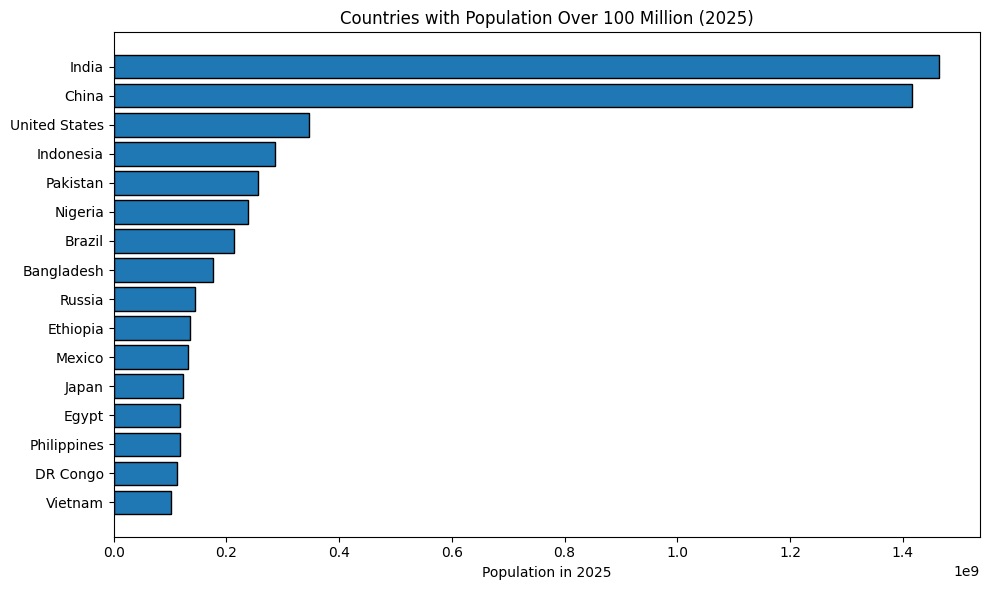

In [142]:
#Countries with Population Over 100 Million (2025)
plt.figure(figsize=(10, 6))
plt.barh(high_pop_sorted["country"], high_pop_sorted["pop2025"], edgecolor="black")
plt.xlabel("Population in 2025")
plt.title("Countries with Population Over 100 Million (2025)")
plt.tight_layout()
plt.show()

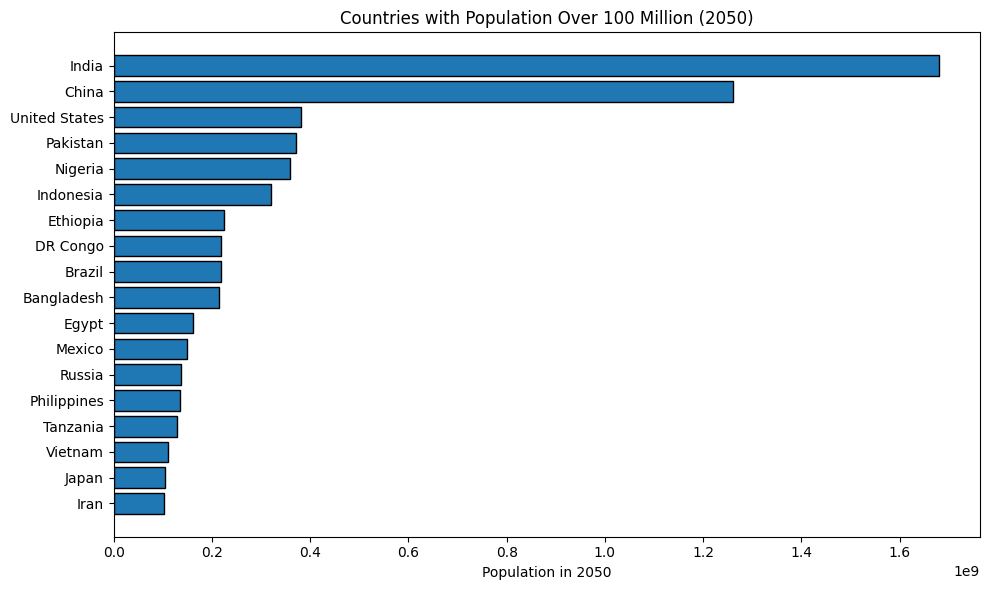

In [143]:
#Filter and sort countries with population over 100 million in 2050
high_pop_2050 = df[df["pop2050"] > 100_000_000][["country", "pop2050"]]
high_pop_sorted_2050 = high_pop_2050.sort_values(by="pop2050", ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(high_pop_sorted_2050["country"], high_pop_sorted_2050["pop2050"], edgecolor="black")
plt.xlabel("Population in 2050")
plt.title("Countries with Population Over 100 Million (2050)")
plt.tight_layout()
plt.show()

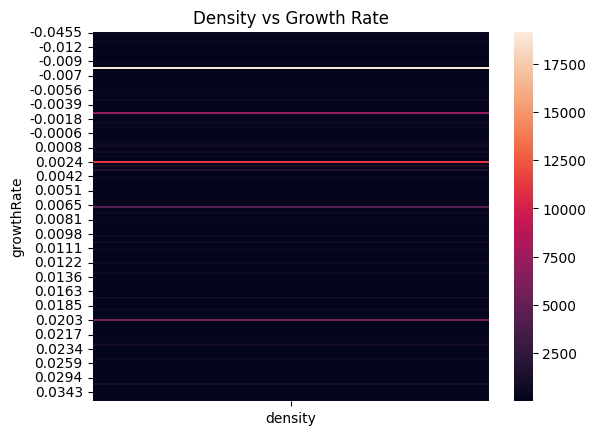

In [144]:
pivot = df.pivot_table(values="density", index="growthRate", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Density vs Growth Rate")
plt.show()